In [87]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('kc_house_data.csv')

In [29]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [30]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


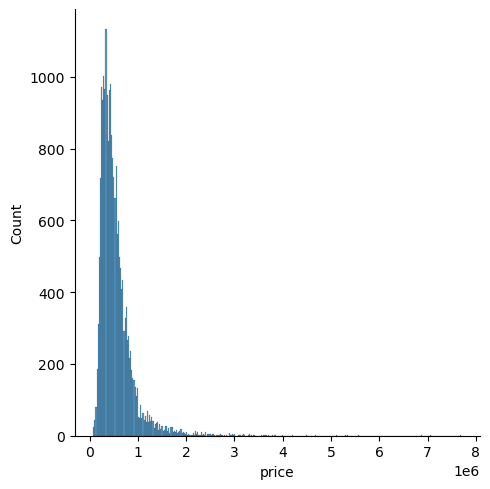

In [32]:

sns.displot(df['price'])

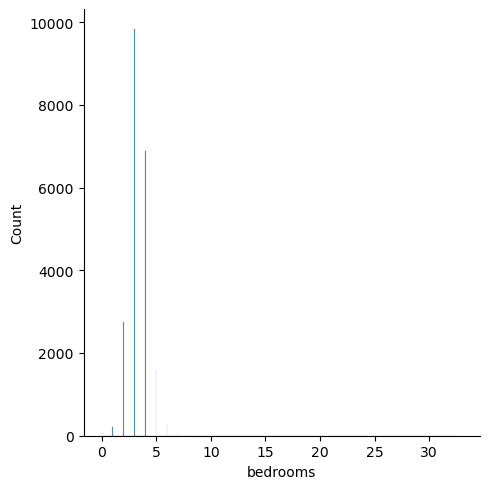

In [36]:
sns.displot(df.bedrooms)

In [34]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [37]:
df.corr()['price'].sort_values()

/var/folders/st/9f5h92v13m3fp3hf8zx6tbpm0000gn/T/ipykernel_42589/321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='bedrooms', ylabel='price'>

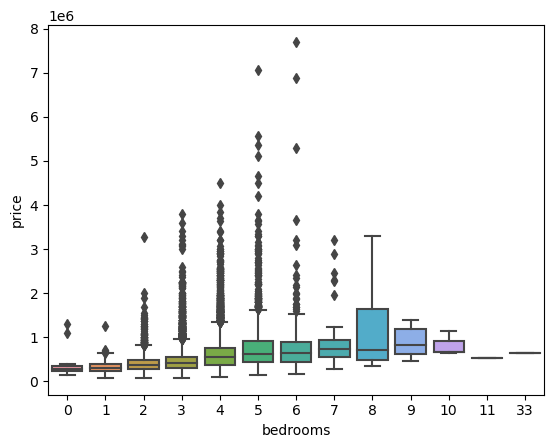

In [42]:
sns.boxplot(y='price',x='bedrooms',data=df)

<Axes: xlabel='long', ylabel='lat'>

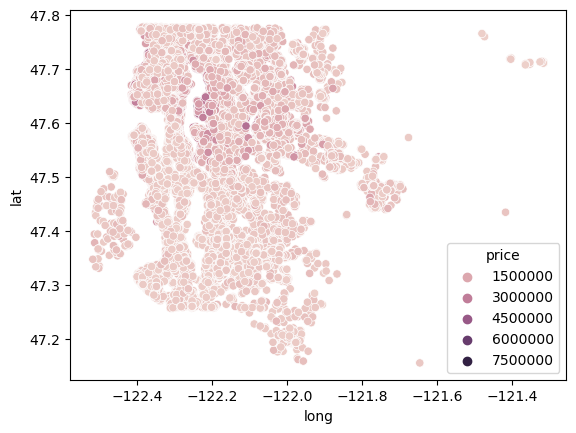

In [46]:
sns.scatterplot(y='lat',x='long',data=df,hue='price'  )

In [55]:
df.sort_values('price',ascending=False).head(20)[0:1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [61]:
len(df) 


21613

In [59]:
no_one_pec = df.sort_values('price',ascending=False).iloc[217:]

In [60]:
len(no_one_pec)

21396

In [62]:
df=df.drop('id',axis=1)

In [63]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [64]:
df['date']= pd.to_datetime(df['date'])

In [68]:
 df['date'].dtype
    

dtype('<M8[ns]')

In [69]:
df['year']=df['date'].apply(lambda date:date.year)

In [71]:
df['month']=df['date'].apply(lambda date:date.month)

In [72]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [74]:
df['month'].value_counts()

5     2414
4     2231
7     2211
6     2180
8     1940
10    1878
3     1875
9     1774
12    1471
11    1411
2     1250
1      978
Name: month, dtype: int64

/var/folders/st/9f5h92v13m3fp3hf8zx6tbpm0000gn/T/ipykernel_42589/366114082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean()['price'].plot()


<Axes: xlabel='year'>

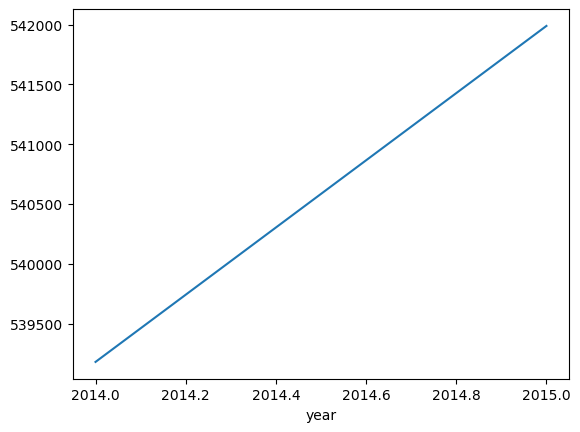

In [79]:
df.groupby('year').mean()['price'].plot()

In [80]:
df = df.drop('date',axis=1)

In [81]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [84]:
df.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [85]:
df = df.drop('zipcode',axis=1)

In [86]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [88]:
X = df.drop('price',axis=1).values
y= df['price'].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

X_train

array([[3.000e+00, 2.500e+00, 1.920e+03, ..., 5.100e+03, 2.015e+03,
        2.000e+00],
       [4.000e+00, 2.500e+00, 2.620e+03, ..., 8.174e+03, 2.014e+03,
        7.000e+00],
       [3.000e+00, 2.500e+00, 1.590e+03, ..., 3.924e+03, 2.014e+03,
        8.000e+00],
       ...,
       [3.000e+00, 2.250e+00, 1.780e+03, ..., 7.625e+03, 2.014e+03,
        1.000e+01],
       [2.000e+00, 1.000e+00, 1.150e+03, ..., 4.320e+03, 2.014e+03,
        9.000e+00],
       [3.000e+00, 1.000e+00, 1.450e+03, ..., 7.740e+03, 2.015e+03,
        3.000e+00]])

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [98]:
X_train.shape

(15129, 19)

In [193]:
model = Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [194]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=1500)

Epoch 1/1500
119/119 [==============================] - 1s 3ms/step - loss: 423634501632.0000 - val_loss: 433066278912.0000
Epoch 2/1500
119/119 [==============================] - 0s 2ms/step - loss: 423521452032.0000 - val_loss: 432743120896.0000
Epoch 3/1500
119/119 [==============================] - 0s 1ms/step - loss: 422577045504.0000 - val_loss: 430778613760.0000
Epoch 4/1500
119/119 [==============================] - 0s 2ms/step - loss: 418656714752.0000 - val_loss: 424203354112.0000
Epoch 5/1500
119/119 [==============================] - 0s 1ms/step - loss: 408446173184.0000 - val_loss: 409464307712.0000
Epoch 6/1500
119/119 [==============================] - 0s 2ms/step - loss: 388499898368.0000 - val_loss: 383385534464.0000
Epoch 7/1500
119/119 [==============================] - 0s 2ms/step - loss: 356330045440.0000 - val_loss: 344428511232.0000
Epoch 8/1500
119/119 [==============================] - 0s 2ms/step - loss: 311913742336.0000 - val_loss: 294201163776.0000
Epoch 9/

119/119 [==============================] - 0s 1ms/step - loss: 54281908224.0000 - val_loss: 54971494400.0000
Epoch 68/1500
119/119 [==============================] - 0s 2ms/step - loss: 53831585792.0000 - val_loss: 54484533248.0000
Epoch 69/1500
119/119 [==============================] - 0s 1ms/step - loss: 53414981632.0000 - val_loss: 54036471808.0000
Epoch 70/1500
119/119 [==============================] - 0s 2ms/step - loss: 53029335040.0000 - val_loss: 53601538048.0000
Epoch 71/1500
119/119 [==============================] - 0s 1ms/step - loss: 52670984192.0000 - val_loss: 53249343488.0000
Epoch 72/1500
119/119 [==============================] - 0s 1ms/step - loss: 52335685632.0000 - val_loss: 52845043712.0000
Epoch 73/1500
119/119 [==============================] - 0s 1ms/step - loss: 52027293696.0000 - val_loss: 52486737920.0000
Epoch 74/1500
119/119 [==============================] - 0s 1ms/step - loss: 51716227072.0000 - val_loss: 52173676544.0000
Epoch 75/1500
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 41637060608.0000 - val_loss: 41645367296.0000
Epoch 134/1500
119/119 [==============================] - 0s 1ms/step - loss: 41495457792.0000 - val_loss: 41512398848.0000
Epoch 135/1500
119/119 [==============================] - 0s 1ms/step - loss: 41377820672.0000 - val_loss: 41373782016.0000
Epoch 136/1500
119/119 [==============================] - 0s 1ms/step - loss: 41233145856.0000 - val_loss: 41221824512.0000
Epoch 137/1500
119/119 [==============================] - 0s 1ms/step - loss: 41109053440.0000 - val_loss: 41095725056.0000
Epoch 138/1500
119/119 [==============================] - 0s 1ms/step - loss: 40980713472.0000 - val_loss: 40971517952.0000
Epoch 139/1500
119/119 [==============================] - 0s 1ms/step - loss: 40886480896.0000 - val_loss: 40843759616.0000
Epoch 140/1500
119/119 [==============================] - 0s 1ms/step - loss: 40774279168.0000 - val_loss: 40729042944.0000
Epoch 141/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 37136293888.0000 - val_loss: 36896555008.0000
Epoch 200/1500
119/119 [==============================] - 0s 1ms/step - loss: 37105090560.0000 - val_loss: 36845166592.0000
Epoch 201/1500
119/119 [==============================] - 0s 1ms/step - loss: 37058498560.0000 - val_loss: 36806823936.0000
Epoch 202/1500
119/119 [==============================] - 0s 2ms/step - loss: 37016727552.0000 - val_loss: 36768612352.0000
Epoch 203/1500
119/119 [==============================] - 0s 1ms/step - loss: 36982235136.0000 - val_loss: 36708900864.0000
Epoch 204/1500
119/119 [==============================] - 0s 1ms/step - loss: 36942364672.0000 - val_loss: 36673269760.0000
Epoch 205/1500
119/119 [==============================] - 0s 1ms/step - loss: 36901781504.0000 - val_loss: 36631973888.0000
Epoch 206/1500
119/119 [==============================] - 0s 1ms/step - loss: 36860977152.0000 - val_loss: 36596346880.0000
Epoch 207/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 35117195264.0000 - val_loss: 34802565120.0000
Epoch 266/1500
119/119 [==============================] - 0s 1ms/step - loss: 35112308736.0000 - val_loss: 34774794240.0000
Epoch 267/1500
119/119 [==============================] - 0s 1ms/step - loss: 35065950208.0000 - val_loss: 34782208000.0000
Epoch 268/1500
119/119 [==============================] - 0s 1ms/step - loss: 35077095424.0000 - val_loss: 34725797888.0000
Epoch 269/1500
119/119 [==============================] - 0s 1ms/step - loss: 35028197376.0000 - val_loss: 34723971072.0000
Epoch 270/1500
119/119 [==============================] - 0s 2ms/step - loss: 35012567040.0000 - val_loss: 34681655296.0000
Epoch 271/1500
119/119 [==============================] - 0s 2ms/step - loss: 34989895680.0000 - val_loss: 34662096896.0000
Epoch 272/1500
119/119 [==============================] - 0s 2ms/step - loss: 34970058752.0000 - val_loss: 34635612160.0000
Epoch 273/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 33675960320.0000 - val_loss: 33300338688.0000
Epoch 332/1500
119/119 [==============================] - 0s 1ms/step - loss: 33655394304.0000 - val_loss: 33296267264.0000
Epoch 333/1500
119/119 [==============================] - 0s 1ms/step - loss: 33648250880.0000 - val_loss: 33267775488.0000
Epoch 334/1500
119/119 [==============================] - 0s 1ms/step - loss: 33641428992.0000 - val_loss: 33244149760.0000
Epoch 335/1500
119/119 [==============================] - 0s 1ms/step - loss: 33620625408.0000 - val_loss: 33234802688.0000
Epoch 336/1500
119/119 [==============================] - 0s 1ms/step - loss: 33624561664.0000 - val_loss: 33227264000.0000
Epoch 337/1500
119/119 [==============================] - 0s 1ms/step - loss: 33587830784.0000 - val_loss: 33206235136.0000
Epoch 338/1500
119/119 [==============================] - 0s 1ms/step - loss: 33573388288.0000 - val_loss: 33210177536.0000
Epoch 339/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 32838660096.0000 - val_loss: 32461699072.0000
Epoch 398/1500
119/119 [==============================] - 0s 1ms/step - loss: 32823656448.0000 - val_loss: 32430653440.0000
Epoch 399/1500
119/119 [==============================] - 0s 1ms/step - loss: 32814368768.0000 - val_loss: 32412334080.0000
Epoch 400/1500
119/119 [==============================] - 0s 1ms/step - loss: 32800184320.0000 - val_loss: 32410238976.0000
Epoch 401/1500
119/119 [==============================] - 0s 1ms/step - loss: 32798769152.0000 - val_loss: 32392716288.0000
Epoch 402/1500
119/119 [==============================] - 0s 1ms/step - loss: 32788340736.0000 - val_loss: 32391129088.0000
Epoch 403/1500
119/119 [==============================] - 0s 1ms/step - loss: 32781395968.0000 - val_loss: 32368769024.0000
Epoch 404/1500
119/119 [==============================] - 0s 1ms/step - loss: 32750774272.0000 - val_loss: 32361322496.0000
Epoch 405/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 32175931392.0000 - val_loss: 31796226048.0000
Epoch 464/1500
119/119 [==============================] - 0s 1ms/step - loss: 32182620160.0000 - val_loss: 31781961728.0000
Epoch 465/1500
119/119 [==============================] - 0s 1ms/step - loss: 32200003584.0000 - val_loss: 31749109760.0000
Epoch 466/1500
119/119 [==============================] - 0s 1ms/step - loss: 32174778368.0000 - val_loss: 31730550784.0000
Epoch 467/1500
119/119 [==============================] - 0s 1ms/step - loss: 32154587136.0000 - val_loss: 31735613440.0000
Epoch 468/1500
119/119 [==============================] - 0s 1ms/step - loss: 32163799040.0000 - val_loss: 31721768960.0000
Epoch 469/1500
119/119 [==============================] - 0s 2ms/step - loss: 32152846336.0000 - val_loss: 31704715264.0000
Epoch 470/1500
119/119 [==============================] - 0s 2ms/step - loss: 32128868352.0000 - val_loss: 31721635840.0000
Epoch 471/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 31635705856.0000 - val_loss: 31200727040.0000
Epoch 530/1500
119/119 [==============================] - 0s 1ms/step - loss: 31636008960.0000 - val_loss: 31144898560.0000
Epoch 531/1500
119/119 [==============================] - 0s 1ms/step - loss: 31616913408.0000 - val_loss: 31151005696.0000
Epoch 532/1500
119/119 [==============================] - 0s 1ms/step - loss: 31595503616.0000 - val_loss: 31117420544.0000
Epoch 533/1500
119/119 [==============================] - 0s 2ms/step - loss: 31590815744.0000 - val_loss: 31141996544.0000
Epoch 534/1500
119/119 [==============================] - 0s 1ms/step - loss: 31609073664.0000 - val_loss: 31124228096.0000
Epoch 535/1500
119/119 [==============================] - 0s 1ms/step - loss: 31568984064.0000 - val_loss: 31098296320.0000
Epoch 536/1500
119/119 [==============================] - 0s 1ms/step - loss: 31565025280.0000 - val_loss: 31120467968.0000
Epoch 537/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 31114348544.0000 - val_loss: 30606026752.0000
Epoch 596/1500
119/119 [==============================] - 0s 1ms/step - loss: 31108728832.0000 - val_loss: 30594740224.0000
Epoch 597/1500
119/119 [==============================] - 0s 1ms/step - loss: 31103363072.0000 - val_loss: 30591744000.0000
Epoch 598/1500
119/119 [==============================] - 0s 1ms/step - loss: 31089756160.0000 - val_loss: 30591434752.0000
Epoch 599/1500
119/119 [==============================] - 0s 1ms/step - loss: 31086303232.0000 - val_loss: 30578137088.0000
Epoch 600/1500
119/119 [==============================] - 0s 1ms/step - loss: 31096027136.0000 - val_loss: 30575333376.0000
Epoch 601/1500
119/119 [==============================] - 0s 1ms/step - loss: 31067318272.0000 - val_loss: 30566610944.0000
Epoch 602/1500
119/119 [==============================] - 0s 1ms/step - loss: 31084720128.0000 - val_loss: 30560102400.0000
Epoch 603/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 30705704960.0000 - val_loss: 30229764096.0000
Epoch 662/1500
119/119 [==============================] - 0s 1ms/step - loss: 30710595584.0000 - val_loss: 30226749440.0000
Epoch 663/1500
119/119 [==============================] - 0s 1ms/step - loss: 30698323968.0000 - val_loss: 30268147712.0000
Epoch 664/1500
119/119 [==============================] - 0s 1ms/step - loss: 30714232832.0000 - val_loss: 30229200896.0000
Epoch 665/1500
119/119 [==============================] - 0s 1ms/step - loss: 30689433600.0000 - val_loss: 30219655168.0000
Epoch 666/1500
119/119 [==============================] - 0s 1ms/step - loss: 30671769600.0000 - val_loss: 30200145920.0000
Epoch 667/1500
119/119 [==============================] - 0s 1ms/step - loss: 30679537664.0000 - val_loss: 30195451904.0000
Epoch 668/1500
119/119 [==============================] - 0s 1ms/step - loss: 30674049024.0000 - val_loss: 30196180992.0000
Epoch 669/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 30364176384.0000 - val_loss: 29969985536.0000
Epoch 728/1500
119/119 [==============================] - 0s 1ms/step - loss: 30369224704.0000 - val_loss: 29948375040.0000
Epoch 729/1500
119/119 [==============================] - 0s 1ms/step - loss: 30368985088.0000 - val_loss: 29921105920.0000
Epoch 730/1500
119/119 [==============================] - 0s 1ms/step - loss: 30366689280.0000 - val_loss: 29916332032.0000
Epoch 731/1500
119/119 [==============================] - 0s 1ms/step - loss: 30366269440.0000 - val_loss: 29945491456.0000
Epoch 732/1500
119/119 [==============================] - 0s 1ms/step - loss: 30360915968.0000 - val_loss: 29945700352.0000
Epoch 733/1500
119/119 [==============================] - 0s 1ms/step - loss: 30344605696.0000 - val_loss: 29913114624.0000
Epoch 734/1500
119/119 [==============================] - 0s 1ms/step - loss: 30329051136.0000 - val_loss: 29919549440.0000
Epoch 735/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 30056460288.0000 - val_loss: 29620047872.0000
Epoch 794/1500
119/119 [==============================] - 0s 1ms/step - loss: 30043461632.0000 - val_loss: 29660706816.0000
Epoch 795/1500
119/119 [==============================] - 0s 1ms/step - loss: 30061408256.0000 - val_loss: 29628841984.0000
Epoch 796/1500
119/119 [==============================] - 0s 1ms/step - loss: 30038634496.0000 - val_loss: 29606950912.0000
Epoch 797/1500
119/119 [==============================] - 0s 1ms/step - loss: 30037774336.0000 - val_loss: 29597659136.0000
Epoch 798/1500
119/119 [==============================] - 0s 1ms/step - loss: 30042781696.0000 - val_loss: 29628071936.0000
Epoch 799/1500
119/119 [==============================] - 0s 1ms/step - loss: 30032850944.0000 - val_loss: 29587920896.0000
Epoch 800/1500
119/119 [==============================] - 0s 1ms/step - loss: 30024628224.0000 - val_loss: 29582678016.0000
Epoch 801/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 29772564480.0000 - val_loss: 29349580800.0000
Epoch 860/1500
119/119 [==============================] - 0s 1ms/step - loss: 29790756864.0000 - val_loss: 29361082368.0000
Epoch 861/1500
119/119 [==============================] - 0s 1ms/step - loss: 29758531584.0000 - val_loss: 29325617152.0000
Epoch 862/1500
119/119 [==============================] - 0s 1ms/step - loss: 29773674496.0000 - val_loss: 29321259008.0000
Epoch 863/1500
119/119 [==============================] - 0s 1ms/step - loss: 29782208512.0000 - val_loss: 29350311936.0000
Epoch 864/1500
119/119 [==============================] - 0s 1ms/step - loss: 29750136832.0000 - val_loss: 29314906112.0000
Epoch 865/1500
119/119 [==============================] - 0s 1ms/step - loss: 29751179264.0000 - val_loss: 29334366208.0000
Epoch 866/1500
119/119 [==============================] - 0s 1ms/step - loss: 29774770176.0000 - val_loss: 29300207616.0000
Epoch 867/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 29538963456.0000 - val_loss: 29100042240.0000
Epoch 926/1500
119/119 [==============================] - 0s 1ms/step - loss: 29537142784.0000 - val_loss: 29165193216.0000
Epoch 927/1500
119/119 [==============================] - 0s 1ms/step - loss: 29540429824.0000 - val_loss: 29097697280.0000
Epoch 928/1500
119/119 [==============================] - 0s 1ms/step - loss: 29529733120.0000 - val_loss: 29077585920.0000
Epoch 929/1500
119/119 [==============================] - 0s 1ms/step - loss: 29545492480.0000 - val_loss: 29120866304.0000
Epoch 930/1500
119/119 [==============================] - 0s 1ms/step - loss: 29510420480.0000 - val_loss: 29084272640.0000
Epoch 931/1500
119/119 [==============================] - 0s 1ms/step - loss: 29513146368.0000 - val_loss: 29074298880.0000
Epoch 932/1500
119/119 [==============================] - 0s 1ms/step - loss: 29508960256.0000 - val_loss: 29081286656.0000
Epoch 933/1500
119/119 

119/119 [==============================] - 0s 1ms/step - loss: 29263329280.0000 - val_loss: 28864837632.0000
Epoch 992/1500
119/119 [==============================] - 0s 1ms/step - loss: 29270769664.0000 - val_loss: 28860340224.0000
Epoch 993/1500
119/119 [==============================] - 0s 1ms/step - loss: 29281646592.0000 - val_loss: 28852883456.0000
Epoch 994/1500
119/119 [==============================] - 0s 1ms/step - loss: 29252603904.0000 - val_loss: 28855975936.0000
Epoch 995/1500
119/119 [==============================] - 0s 1ms/step - loss: 29264003072.0000 - val_loss: 28843597824.0000
Epoch 996/1500
119/119 [==============================] - 0s 1ms/step - loss: 29263443968.0000 - val_loss: 28837126144.0000
Epoch 997/1500
119/119 [==============================] - 0s 1ms/step - loss: 29265057792.0000 - val_loss: 28828659712.0000
Epoch 998/1500
119/119 [==============================] - 0s 1ms/step - loss: 29242234880.0000 - val_loss: 28846962688.0000
Epoch 999/1500
119/119 

Epoch 1057/1500
119/119 [==============================] - 0s 1ms/step - loss: 28941828096.0000 - val_loss: 28565841920.0000
Epoch 1058/1500
119/119 [==============================] - 0s 1ms/step - loss: 28934602752.0000 - val_loss: 28568625152.0000
Epoch 1059/1500
119/119 [==============================] - 0s 1ms/step - loss: 28928673792.0000 - val_loss: 28553074688.0000
Epoch 1060/1500
119/119 [==============================] - 0s 1ms/step - loss: 28933926912.0000 - val_loss: 28568217600.0000
Epoch 1061/1500
119/119 [==============================] - 0s 1ms/step - loss: 28914903040.0000 - val_loss: 28555134976.0000
Epoch 1062/1500
119/119 [==============================] - 0s 1ms/step - loss: 28903225344.0000 - val_loss: 28541794304.0000
Epoch 1063/1500
119/119 [==============================] - 0s 1ms/step - loss: 28909647872.0000 - val_loss: 28577062912.0000
Epoch 1064/1500
119/119 [==============================] - 0s 1ms/step - loss: 28905420800.0000 - val_loss: 28608727040.0000


119/119 [==============================] - 0s 2ms/step - loss: 28619753472.0000 - val_loss: 28293873664.0000
Epoch 1123/1500
119/119 [==============================] - 0s 2ms/step - loss: 28611209216.0000 - val_loss: 28294187008.0000
Epoch 1124/1500
119/119 [==============================] - 0s 2ms/step - loss: 28629524480.0000 - val_loss: 28309389312.0000
Epoch 1125/1500
119/119 [==============================] - 0s 2ms/step - loss: 28600014848.0000 - val_loss: 28279873536.0000
Epoch 1126/1500
119/119 [==============================] - 0s 2ms/step - loss: 28584017920.0000 - val_loss: 28279492608.0000
Epoch 1127/1500
119/119 [==============================] - 0s 1ms/step - loss: 28605188096.0000 - val_loss: 28268931072.0000
Epoch 1128/1500
119/119 [==============================] - 0s 2ms/step - loss: 28590106624.0000 - val_loss: 28289470464.0000
Epoch 1129/1500
119/119 [==============================] - 0s 2ms/step - loss: 28586340352.0000 - val_loss: 28288212992.0000
Epoch 1130/1500


119/119 [==============================] - 0s 1ms/step - loss: 28302782464.0000 - val_loss: 28101574656.0000
Epoch 1188/1500
119/119 [==============================] - 0s 2ms/step - loss: 28290285568.0000 - val_loss: 28085946368.0000
Epoch 1189/1500
119/119 [==============================] - 0s 1ms/step - loss: 28282324992.0000 - val_loss: 28092033024.0000
Epoch 1190/1500
119/119 [==============================] - 0s 1ms/step - loss: 28263094272.0000 - val_loss: 28135299072.0000
Epoch 1191/1500
119/119 [==============================] - 0s 1ms/step - loss: 28272261120.0000 - val_loss: 28080695296.0000
Epoch 1192/1500
119/119 [==============================] - 0s 1ms/step - loss: 28253931520.0000 - val_loss: 28079656960.0000
Epoch 1193/1500
119/119 [==============================] - 0s 1ms/step - loss: 28265271296.0000 - val_loss: 28077731840.0000
Epoch 1194/1500
119/119 [==============================] - 0s 1ms/step - loss: 28254580736.0000 - val_loss: 28083030016.0000
Epoch 1195/1500


119/119 [==============================] - 0s 1ms/step - loss: 27985557504.0000 - val_loss: 27885160448.0000
Epoch 1253/1500
119/119 [==============================] - 0s 1ms/step - loss: 27980277760.0000 - val_loss: 27883651072.0000
Epoch 1254/1500
119/119 [==============================] - 0s 1ms/step - loss: 27970844672.0000 - val_loss: 27924013056.0000
Epoch 1255/1500
119/119 [==============================] - 0s 1ms/step - loss: 27962892288.0000 - val_loss: 27877449728.0000
Epoch 1256/1500
119/119 [==============================] - 0s 1ms/step - loss: 27974209536.0000 - val_loss: 27880095744.0000
Epoch 1257/1500
119/119 [==============================] - 0s 1ms/step - loss: 27962740736.0000 - val_loss: 27873124352.0000
Epoch 1258/1500
119/119 [==============================] - 0s 1ms/step - loss: 27939823616.0000 - val_loss: 27959885824.0000
Epoch 1259/1500
119/119 [==============================] - 0s 1ms/step - loss: 27956191232.0000 - val_loss: 27886276608.0000
Epoch 1260/1500


119/119 [==============================] - 0s 1ms/step - loss: 27672248320.0000 - val_loss: 27687258112.0000
Epoch 1318/1500
119/119 [==============================] - 0s 1ms/step - loss: 27670194176.0000 - val_loss: 27681275904.0000
Epoch 1319/1500
119/119 [==============================] - 0s 1ms/step - loss: 27673225216.0000 - val_loss: 27680745472.0000
Epoch 1320/1500
119/119 [==============================] - 0s 1ms/step - loss: 27653068800.0000 - val_loss: 27716700160.0000
Epoch 1321/1500
119/119 [==============================] - 0s 1ms/step - loss: 27653294080.0000 - val_loss: 27685902336.0000
Epoch 1322/1500
119/119 [==============================] - 0s 1ms/step - loss: 27639472128.0000 - val_loss: 27676295168.0000
Epoch 1323/1500
119/119 [==============================] - 0s 2ms/step - loss: 27634352128.0000 - val_loss: 27671326720.0000
Epoch 1324/1500
119/119 [==============================] - 0s 1ms/step - loss: 27640836096.0000 - val_loss: 27682029568.0000
Epoch 1325/1500


119/119 [==============================] - 0s 1ms/step - loss: 27398518784.0000 - val_loss: 27503675392.0000
Epoch 1383/1500
119/119 [==============================] - 0s 1ms/step - loss: 27397840896.0000 - val_loss: 27541618688.0000
Epoch 1384/1500
119/119 [==============================] - 0s 1ms/step - loss: 27387342848.0000 - val_loss: 27498438656.0000
Epoch 1385/1500
119/119 [==============================] - 0s 2ms/step - loss: 27376893952.0000 - val_loss: 27521562624.0000
Epoch 1386/1500
119/119 [==============================] - 0s 2ms/step - loss: 27391629312.0000 - val_loss: 27494154240.0000
Epoch 1387/1500
119/119 [==============================] - 0s 1ms/step - loss: 27372208128.0000 - val_loss: 27510804480.0000
Epoch 1388/1500
119/119 [==============================] - 0s 1ms/step - loss: 27362070528.0000 - val_loss: 27506139136.0000
Epoch 1389/1500
119/119 [==============================] - 0s 1ms/step - loss: 27380809728.0000 - val_loss: 27501379584.0000
Epoch 1390/1500


119/119 [==============================] - 0s 1ms/step - loss: 27182716928.0000 - val_loss: 27328323584.0000
Epoch 1448/1500
119/119 [==============================] - 0s 1ms/step - loss: 27154835456.0000 - val_loss: 27330555904.0000
Epoch 1449/1500
119/119 [==============================] - 0s 1ms/step - loss: 27148040192.0000 - val_loss: 27360129024.0000
Epoch 1450/1500
119/119 [==============================] - 0s 1ms/step - loss: 27126808576.0000 - val_loss: 27337371648.0000
Epoch 1451/1500
119/119 [==============================] - 0s 1ms/step - loss: 27148042240.0000 - val_loss: 27313674240.0000
Epoch 1452/1500
119/119 [==============================] - 0s 1ms/step - loss: 27145052160.0000 - val_loss: 27340044288.0000
Epoch 1453/1500
119/119 [==============================] - 0s 1ms/step - loss: 27141367808.0000 - val_loss: 27315302400.0000
Epoch 1454/1500
119/119 [==============================] - 0s 1ms/step - loss: 27125702656.0000 - val_loss: 27323297792.0000
Epoch 1455/1500


<Axes: >

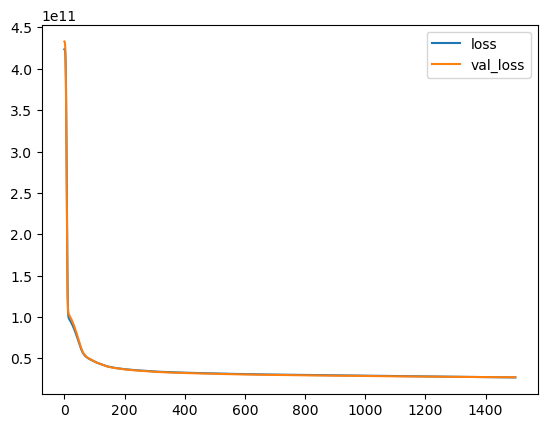

In [196]:
lossses = pd.DataFrame(model.history.history)
lossses.plot()

In [197]:
from sklearn.metrics import mean_squared_error ,median_absolute_error,explained_variance_score


In [198]:
predit = model.predict(X_test)

203/203 [==============================] - 0s 677us/step


In [199]:
np.sqrt(mean_squared_error(y_test,predit))

165188.7193370293

In [200]:
mean_absolute_error(y_test,predit)

103411.70894340877

In [120]:
 df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [121]:
 5.400881e+05
 221900.0000

540088.1

In [201]:
 explained_variance_score(y_test,predit)

0.8057150055185781

In [144]:
no_one_pec[0:1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12577,2806300065,20150422T000000,1960000.0,4,4.0,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237


In [210]:
x = df.drop('price',axis=1).iloc[11]


In [211]:
df.iloc[11]


price            468000.000
bedrooms              2.000
bathrooms             1.000
sqft_living        1160.000
sqft_lot           6000.000
floors                1.000
waterfront            0.000
view                  0.000
condition             4.000
grade                 7.000
sqft_above          860.000
sqft_basement       300.000
yr_built           1942.000
yr_renovated          0.000
lat                  47.690
long               -122.292
sqft_living15      1330.000
sqft_lot15         6000.000
year               2014.000
month                 5.000
Name: 11, dtype: float64

In [212]:
xx =scaler.transform(x.values.reshape(-1,19))

In [213]:
model.predict(xx)

1/1 [==============================] - 0s 27ms/step


array([[401370.1]], dtype=float32)

In [207]:
s =662500.0000/667212.4 *100
s

99.29371816231233